<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
cc = cr.ClusterCatalog()

In [3]:
cat = cc.query_catalog()
cat.head()

Using CantatGaudin2020 catalog.


,Cluster,raJ2015,decJ2015,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc,ra,dec
0,ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,672.0,-583.3,263.1,-205.1,8927.2,51.870,34.981
1,ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,397.3,145.6,360.9,79.9,8202.3,288.399,36.369
2,ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,551.8,251.8,490.5,19.9,8103.0,295.548,27.366
3,ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,878.5,453.5,751.9,-29.2,7922.3,297.164,21.987
4,ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1154.0,309.0,1105.1,122.1,8106.7,298.306,39.349


In [4]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CantatGaudin2020 catalog.


,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,RV,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.0581,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.7757,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.8832,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.8798,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.9800,2.2854,0.6,ASCC_10,52.712107,34.578009


## cross-match each cluster with TGv8

In [5]:
df = cr.get_TGv8_catalog()

In [6]:
from tqdm import tqdm

clusters = {}
for cluster in tqdm(mem.Cluster.unique()):
    stars = mem.query("Cluster==@cluster")
    idx = df.Gaia_source_id.isin(stars.source_id)
    clusters[cluster]=df[idx]
    if len(idx)>0:
        print(cluster)

  0%|          | 2/1481 [00:00<03:04,  8.01it/s]

ASCC_10
ASCC_101


  0%|          | 4/1481 [00:00<02:46,  8.88it/s]

ASCC_105
ASCC_107
ASCC_108


  0%|          | 7/1481 [00:00<02:38,  9.32it/s]

ASCC_11
ASCC_110
ASCC_111


  1%|          | 10/1481 [00:01<02:32,  9.62it/s]

ASCC_113
ASCC_114
ASCC_115


  1%|          | 14/1481 [00:01<02:20, 10.43it/s]

ASCC_12
ASCC_123
ASCC_127


  1%|          | 16/1481 [00:01<02:22, 10.27it/s]

ASCC_128
ASCC_13
ASCC_16


  1%|▏         | 20/1481 [00:01<02:23, 10.20it/s]

ASCC_19
ASCC_21
ASCC_23


  1%|▏         | 22/1481 [00:02<02:22, 10.26it/s]

ASCC_29
ASCC_30
ASCC_32


  2%|▏         | 26/1481 [00:02<02:20, 10.33it/s]

ASCC_41
ASCC_58
ASCC_6


  2%|▏         | 28/1481 [00:02<02:12, 10.96it/s]

ASCC_66
ASCC_67
ASCC_71


  2%|▏         | 32/1481 [00:03<02:16, 10.61it/s]

ASCC_73
ASCC_77
ASCC_79


  2%|▏         | 34/1481 [00:03<02:25,  9.94it/s]

ASCC_85
ASCC_87


  2%|▏         | 36/1481 [00:03<02:24,  9.99it/s]

ASCC_88
ASCC_9
ASCC_90


  3%|▎         | 40/1481 [00:03<02:20, 10.28it/s]

ASCC_97
ASCC_99
Alessi_1


  3%|▎         | 42/1481 [00:04<02:20, 10.27it/s]

Alessi_10
Alessi_12
Alessi_13
Alessi_15


  3%|▎         | 47/1481 [00:04<02:00, 11.94it/s]

Alessi_17
Alessi_18
Alessi_19


  3%|▎         | 49/1481 [00:04<02:07, 11.23it/s]

Alessi_2
Alessi_20
Alessi_21


  4%|▎         | 53/1481 [00:05<02:11, 10.89it/s]

Alessi_24
Alessi_3
Alessi_31


  4%|▎         | 55/1481 [00:05<02:13, 10.72it/s]

Alessi_37
Alessi_43
Alessi_44


  4%|▍         | 59/1481 [00:05<02:05, 11.29it/s]

Alessi_5
Alessi_53
Alessi_59


  4%|▍         | 61/1481 [00:05<02:09, 11.00it/s]

Alessi_6
Alessi_60
Alessi_62


  4%|▍         | 65/1481 [00:06<02:12, 10.71it/s]

Alessi_8
Alessi_9
Alessi_Teutsch_11


  5%|▍         | 67/1481 [00:06<02:12, 10.71it/s]

Alessi_Teutsch_12
Alessi_Teutsch_3
Alessi_Teutsch_5


  5%|▍         | 71/1481 [00:06<02:07, 11.09it/s]

Alessi_Teutsch_8
Andrews_Lindsay_5
Antalova_2


  5%|▍         | 73/1481 [00:06<02:05, 11.19it/s]

Archinal_1
Arp_Madore_2
Auner_1


  5%|▌         | 78/1481 [00:07<01:50, 12.66it/s]

Aveni_Hunter_1
BDSB30
BDSB91
BDSB93


  5%|▌         | 80/1481 [00:07<02:00, 11.58it/s]

BDSB96
BH_111
BH_118


  6%|▌         | 84/1481 [00:07<02:04, 11.18it/s]

BH_121
BH_132
BH_144


  6%|▌         | 86/1481 [00:07<02:08, 10.83it/s]

BH_150
BH_151
BH_164


  6%|▌         | 90/1481 [00:08<02:07, 10.90it/s]

BH_19
BH_200
BH_202


  6%|▌         | 92/1481 [00:08<02:07, 10.88it/s]

BH_205
BH_211


  6%|▋         | 96/1481 [00:08<02:13, 10.37it/s]

BH_217
BH_221
BH_222
BH_23


  7%|▋         | 98/1481 [00:09<02:11, 10.48it/s]

BH_245
BH_37
BH_54


  7%|▋         | 102/1481 [00:09<02:08, 10.73it/s]

BH_55
BH_56
BH_66


  7%|▋         | 104/1481 [00:09<02:09, 10.66it/s]

BH_67
BH_72


  7%|▋         | 106/1481 [00:09<02:16, 10.04it/s]

BH_73
BH_78
BH_84


  7%|▋         | 110/1481 [00:10<02:11, 10.42it/s]

BH_85
BH_87
BH_90


  8%|▊         | 112/1481 [00:10<02:09, 10.58it/s]

BH_92
BH_99


  8%|▊         | 114/1481 [00:10<02:12, 10.31it/s]

Barkhatova_1
Basel_1
Basel_10


  8%|▊         | 118/1481 [00:11<02:04, 10.90it/s]

Basel_11a
Basel_11b
Basel_17


  8%|▊         | 120/1481 [00:11<02:05, 10.87it/s]

Basel_18
Basel_4
Basel_8


  8%|▊         | 122/1481 [00:11<02:07, 10.70it/s]

Berkeley_1
Berkeley_10


  9%|▊         | 126/1481 [00:11<02:05, 10.80it/s]

Berkeley_100
Berkeley_101
Berkeley_102


  9%|▊         | 128/1481 [00:11<02:03, 11.00it/s]

Berkeley_103
Berkeley_104
Berkeley_11


  9%|▉         | 132/1481 [00:12<02:08, 10.53it/s]

Berkeley_12
Berkeley_13
Berkeley_14


  9%|▉         | 134/1481 [00:12<02:09, 10.42it/s]

Berkeley_14A
Berkeley_15
Berkeley_17


  9%|▉         | 138/1481 [00:12<02:08, 10.42it/s]

Berkeley_18
Berkeley_19
Berkeley_2


  9%|▉         | 140/1481 [00:13<02:00, 11.16it/s]

Berkeley_20
Berkeley_21
Berkeley_22


 10%|▉         | 144/1481 [00:13<02:02, 10.92it/s]

Berkeley_23
Berkeley_24
Berkeley_25


 10%|▉         | 146/1481 [00:13<02:04, 10.76it/s]

Berkeley_27
Berkeley_28
Berkeley_29


 10%|█         | 150/1481 [00:14<02:04, 10.67it/s]

Berkeley_30
Berkeley_31
Berkeley_32


 10%|█         | 152/1481 [00:14<02:04, 10.66it/s]

Berkeley_33
Berkeley_34
Berkeley_35


 11%|█         | 156/1481 [00:14<02:05, 10.58it/s]

Berkeley_36
Berkeley_37
Berkeley_39


 11%|█         | 158/1481 [00:14<02:06, 10.48it/s]

Berkeley_4
Berkeley_43
Berkeley_44


 11%|█         | 162/1481 [00:15<02:05, 10.51it/s]

Berkeley_45
Berkeley_47
Berkeley_49


 11%|█         | 164/1481 [00:15<02:02, 10.75it/s]

Berkeley_5
Berkeley_51
Berkeley_52


 11%|█▏        | 168/1481 [00:15<02:05, 10.49it/s]

Berkeley_53
Berkeley_54
Berkeley_55


 11%|█▏        | 170/1481 [00:15<02:05, 10.43it/s]

Berkeley_56
Berkeley_58
Berkeley_59


 12%|█▏        | 172/1481 [00:16<02:06, 10.34it/s]

Berkeley_6
Berkeley_60


 12%|█▏        | 174/1481 [00:16<02:09, 10.09it/s]

Berkeley_61
Berkeley_62


 12%|█▏        | 177/1481 [00:16<02:23,  9.09it/s]

Berkeley_63
Berkeley_65


 12%|█▏        | 179/1481 [00:16<02:23,  9.06it/s]

Berkeley_66
Berkeley_67


 12%|█▏        | 181/1481 [00:17<02:19,  9.34it/s]

Berkeley_68
Berkeley_69
Berkeley_7


 12%|█▏        | 185/1481 [00:17<02:11,  9.88it/s]

Berkeley_70
Berkeley_71
Berkeley_72


 13%|█▎        | 188/1481 [00:17<02:11,  9.86it/s]

Berkeley_73
Berkeley_75
Berkeley_76


 13%|█▎        | 190/1481 [00:17<02:08, 10.07it/s]

Berkeley_77
Berkeley_78
Berkeley_79


 13%|█▎        | 194/1481 [00:18<02:04, 10.35it/s]

Berkeley_8
Berkeley_80
Berkeley_81


 13%|█▎        | 196/1481 [00:18<01:57, 10.97it/s]

Berkeley_82
Berkeley_83
Berkeley_85


 14%|█▎        | 200/1481 [00:18<02:01, 10.54it/s]

Berkeley_86
Berkeley_87
Berkeley_89


 14%|█▎        | 202/1481 [00:19<02:03, 10.38it/s]

Berkeley_9
Berkeley_90
Berkeley_91


 14%|█▍        | 206/1481 [00:19<02:00, 10.59it/s]

Berkeley_92
Berkeley_94
Berkeley_95


 14%|█▍        | 208/1481 [00:19<02:01, 10.44it/s]

Berkeley_96
Berkeley_97
Berkeley_98


 14%|█▍        | 212/1481 [00:20<02:02, 10.37it/s]

Berkeley_99
Bica_3
Biurakan_2


 14%|█▍        | 214/1481 [00:20<02:03, 10.30it/s]

Blanco_1
Bochum_11
Bochum_13


 15%|█▍        | 218/1481 [00:20<02:03, 10.26it/s]

Bochum_3
Bochum_4
Bochum_6


 15%|█▍        | 220/1481 [00:20<02:03, 10.24it/s]

COIN-Gaia_1
COIN-Gaia_10
COIN-Gaia_11


 15%|█▌        | 224/1481 [00:21<02:02, 10.27it/s]

COIN-Gaia_12
COIN-Gaia_13
COIN-Gaia_14


 15%|█▌        | 226/1481 [00:21<02:02, 10.28it/s]

COIN-Gaia_15
COIN-Gaia_16
COIN-Gaia_17


 16%|█▌        | 230/1481 [00:21<02:02, 10.24it/s]

COIN-Gaia_18
COIN-Gaia_19
COIN-Gaia_2


 16%|█▌        | 232/1481 [00:22<02:01, 10.28it/s]

COIN-Gaia_20
COIN-Gaia_21
COIN-Gaia_22


 16%|█▌        | 236/1481 [00:22<02:00, 10.31it/s]

COIN-Gaia_23
COIN-Gaia_24
COIN-Gaia_25


 16%|█▌        | 238/1481 [00:22<02:02, 10.14it/s]

COIN-Gaia_26
COIN-Gaia_27
COIN-Gaia_28


 16%|█▋        | 242/1481 [00:22<02:01, 10.23it/s]

COIN-Gaia_29
COIN-Gaia_3
COIN-Gaia_30


 16%|█▋        | 244/1481 [00:23<02:01, 10.20it/s]

COIN-Gaia_31
COIN-Gaia_32
COIN-Gaia_33


 17%|█▋        | 246/1481 [00:23<02:00, 10.21it/s]

COIN-Gaia_34
COIN-Gaia_35


 17%|█▋        | 250/1481 [00:23<02:01, 10.10it/s]

COIN-Gaia_36
COIN-Gaia_37
COIN-Gaia_38


 17%|█▋        | 252/1481 [00:23<02:01, 10.15it/s]

COIN-Gaia_39
COIN-Gaia_4
COIN-Gaia_40


 17%|█▋        | 256/1481 [00:24<01:56, 10.50it/s]

COIN-Gaia_41
COIN-Gaia_5
COIN-Gaia_6


 17%|█▋        | 258/1481 [00:24<01:59, 10.28it/s]

COIN-Gaia_7
COIN-Gaia_8


 18%|█▊        | 260/1481 [00:24<01:58, 10.26it/s]

COIN-Gaia_9
Collinder_106


 18%|█▊        | 262/1481 [00:24<02:00, 10.14it/s]

Collinder_107
Collinder_110
Collinder_115


 18%|█▊        | 266/1481 [00:25<01:59, 10.14it/s]

Collinder_132
Collinder_135
Collinder_140


 18%|█▊        | 268/1481 [00:25<02:00, 10.04it/s]

Collinder_185
Collinder_197
Collinder_205


 18%|█▊        | 272/1481 [00:25<01:58, 10.20it/s]

Collinder_220
Collinder_258
Collinder_261


 19%|█▊        | 274/1481 [00:26<02:00, 10.05it/s]

Collinder_268
Collinder_269
Collinder_271


 19%|█▊        | 276/1481 [00:26<01:57, 10.24it/s]

Collinder_272
Collinder_277


 19%|█▉        | 280/1481 [00:26<01:57, 10.23it/s]

Collinder_292
Collinder_307
Collinder_338


 19%|█▉        | 282/1481 [00:26<01:58, 10.08it/s]

Collinder_350
Collinder_359
Collinder_394


 19%|█▉        | 286/1481 [00:27<01:53, 10.54it/s]

Collinder_419
Collinder_421
Collinder_463


 19%|█▉        | 288/1481 [00:27<01:53, 10.53it/s]

Collinder_469
Collinder_69
Collinder_74


 20%|█▉        | 292/1481 [00:27<01:46, 11.18it/s]

Collinder_95
Czernik_1
Czernik_10


 20%|█▉        | 294/1481 [00:28<01:51, 10.61it/s]

Czernik_12
Czernik_13


 20%|█▉        | 296/1481 [00:28<01:51, 10.61it/s]

Czernik_14
Czernik_15
Czernik_16


 20%|██        | 298/1481 [00:28<01:50, 10.75it/s]

Czernik_18
Czernik_19


 20%|██        | 302/1481 [00:28<01:54, 10.31it/s]

Czernik_2
Czernik_20
Czernik_21


 21%|██        | 304/1481 [00:28<01:53, 10.39it/s]

Czernik_23
Czernik_24
Czernik_25


 21%|██        | 308/1481 [00:29<01:52, 10.39it/s]

Czernik_26
Czernik_27
Czernik_29


 21%|██        | 310/1481 [00:29<01:55, 10.16it/s]

Czernik_3
Czernik_30
Czernik_31


 21%|██        | 312/1481 [00:29<01:55, 10.08it/s]

Czernik_32
Czernik_37


 21%|██▏       | 316/1481 [00:30<01:56, 10.03it/s]

Czernik_38
Czernik_39
Czernik_40


 21%|██▏       | 318/1481 [00:30<01:58,  9.83it/s]

Czernik_41
Czernik_42


 22%|██▏       | 320/1481 [00:30<02:00,  9.60it/s]

Czernik_44
Czernik_5


 22%|██▏       | 324/1481 [00:30<01:47, 10.75it/s]

Czernik_6
Czernik_8
Czernik_9
DB2001_22


 22%|██▏       | 326/1481 [00:31<01:50, 10.48it/s]

DBSB_100
DBSB_101
DBSB_104
DBSB_21


 22%|██▏       | 331/1481 [00:31<01:41, 11.38it/s]

DBSB_3
DBSB_43
DBSB_6


 22%|██▏       | 333/1481 [00:31<01:41, 11.31it/s]

DBSB_60
DBSB_7
DC_5


 23%|██▎       | 337/1481 [00:32<01:39, 11.55it/s]

DC_8
Danks_1
Danks_2


 23%|██▎       | 339/1481 [00:32<01:41, 11.20it/s]

Dias_1
Dias_2
Dias_5


 23%|██▎       | 343/1481 [00:32<01:41, 11.25it/s]

Dias_6
Dolidze_11
Dolidze_16


 23%|██▎       | 345/1481 [00:32<01:43, 11.02it/s]

Dolidze_3
Dolidze_32
Dolidze_5


 24%|██▎       | 349/1481 [00:33<01:40, 11.23it/s]

Dolidze_53
Dolidze_8
ESO_092_05


 24%|██▎       | 351/1481 [00:33<01:43, 10.95it/s]

ESO_092_18
ESO_130_06
ESO_130_08


 24%|██▍       | 355/1481 [00:33<01:38, 11.45it/s]

ESO_130_13
ESO_134_12
ESO_166_04


 24%|██▍       | 357/1481 [00:33<01:31, 12.25it/s]

ESO_211_03
ESO_211_09
ESO_226_06


 24%|██▍       | 361/1481 [00:34<01:37, 11.48it/s]

ESO_311_21
ESO_312_03
ESO_312_04


 25%|██▍       | 363/1481 [00:34<01:40, 11.16it/s]

ESO_313_03
ESO_368_11
ESO_368_14


 25%|██▍       | 367/1481 [00:34<01:42, 10.92it/s]

ESO_371_25
ESO_393_15
ESO_559_13


 25%|██▍       | 369/1481 [00:34<01:42, 10.81it/s]

ESO_589_26
FSR_0088
FSR_0123


 25%|██▌       | 373/1481 [00:35<01:45, 10.54it/s]

FSR_0133
FSR_0154
FSR_0158


 25%|██▌       | 375/1481 [00:35<01:45, 10.48it/s]

FSR_0165
FSR_0166
FSR_0167


 26%|██▌       | 379/1481 [00:35<01:45, 10.41it/s]

FSR_0172
FSR_0195
FSR_0198


 26%|██▌       | 381/1481 [00:36<01:44, 10.51it/s]

FSR_0238
FSR_0241
FSR_0275


 26%|██▌       | 385/1481 [00:36<01:38, 11.10it/s]

FSR_0278
FSR_0282
FSR_0284


 26%|██▌       | 387/1481 [00:36<01:40, 10.84it/s]

FSR_0296
FSR_0306
FSR_0336


 26%|██▋       | 391/1481 [00:37<01:43, 10.55it/s]

FSR_0342
FSR_0344
FSR_0357


 27%|██▋       | 393/1481 [00:37<01:42, 10.60it/s]

FSR_0384
FSR_0385
FSR_0398


 27%|██▋       | 397/1481 [00:37<01:31, 11.80it/s]

FSR_0401
FSR_0430
FSR_0442


 27%|██▋       | 399/1481 [00:37<01:36, 11.23it/s]

FSR_0448
FSR_0451
FSR_0465


 27%|██▋       | 401/1481 [00:37<01:38, 10.98it/s]

FSR_0494
FSR_0496


 27%|██▋       | 405/1481 [00:38<01:43, 10.39it/s]

FSR_0498
FSR_0519
FSR_0524


 27%|██▋       | 407/1481 [00:38<01:48,  9.91it/s]

FSR_0534
FSR_0536


 28%|██▊       | 409/1481 [00:38<01:48,  9.86it/s]

FSR_0537
FSR_0542
FSR_0551


 28%|██▊       | 413/1481 [00:39<01:41, 10.52it/s]

FSR_0553
FSR_0558
FSR_0667


 28%|██▊       | 415/1481 [00:39<01:36, 11.09it/s]

FSR_0683
FSR_0686
FSR_0716


 28%|██▊       | 417/1481 [00:39<01:40, 10.57it/s]

FSR_0728
FSR_0735


 28%|██▊       | 421/1481 [00:39<01:41, 10.44it/s]

FSR_0771
FSR_0811
FSR_0826


 29%|██▊       | 423/1481 [00:40<01:42, 10.30it/s]

FSR_0833
FSR_0850
FSR_0852


 29%|██▊       | 425/1481 [00:40<01:45, 10.03it/s]

FSR_0866
FSR_0883


 29%|██▉       | 429/1481 [00:40<01:44, 10.11it/s]

FSR_0893
FSR_0904
FSR_0905


 29%|██▉       | 431/1481 [00:40<01:41, 10.31it/s]

FSR_0921
FSR_0923
FSR_0932


 29%|██▉       | 435/1481 [00:41<01:41, 10.32it/s]

FSR_0935
FSR_0937
FSR_0941


 30%|██▉       | 437/1481 [00:41<01:41, 10.29it/s]

FSR_0942
FSR_0948
FSR_0951


 30%|██▉       | 441/1481 [00:41<01:41, 10.22it/s]

FSR_0953
FSR_0968
FSR_0974


 30%|██▉       | 443/1481 [00:41<01:35, 10.86it/s]

FSR_0975
FSR_0977
FSR_0979


 30%|███       | 448/1481 [00:42<01:26, 11.92it/s]

FSR_0985
FSR_1025
FSR_1032
FSR_1051


 30%|███       | 450/1481 [00:42<01:31, 11.28it/s]

FSR_1063
FSR_1083
FSR_1085


 31%|███       | 454/1481 [00:42<01:31, 11.28it/s]

FSR_1113
FSR_1117
FSR_1125


 31%|███       | 456/1481 [00:43<01:33, 10.97it/s]

FSR_1144
FSR_1150
FSR_1153


 31%|███       | 460/1481 [00:43<01:25, 11.97it/s]

FSR_1163
FSR_1170
FSR_1171


 31%|███       | 462/1481 [00:43<01:28, 11.53it/s]

FSR_1172
FSR_1180


 31%|███▏      | 464/1481 [00:43<01:33, 10.86it/s]

FSR_1183
FSR_1207


 31%|███▏      | 466/1481 [00:44<01:36, 10.55it/s]

FSR_1209
FSR_1211
FSR_1212


 32%|███▏      | 470/1481 [00:44<01:34, 10.68it/s]

FSR_1252
FSR_1253
FSR_1260


 32%|███▏      | 472/1481 [00:44<01:29, 11.30it/s]

FSR_1284
FSR_1297
FSR_1315


 32%|███▏      | 476/1481 [00:44<01:32, 10.86it/s]

FSR_1335
FSR_1342
FSR_1352


 32%|███▏      | 478/1481 [00:45<01:33, 10.78it/s]

FSR_1360
FSR_1361
FSR_1363


 33%|███▎      | 482/1481 [00:45<01:31, 10.97it/s]

FSR_1378
FSR_1380
FSR_1399


 33%|███▎      | 484/1481 [00:45<01:32, 10.77it/s]

FSR_1402
FSR_1407
FSR_1419


 33%|███▎      | 488/1481 [00:46<01:30, 10.92it/s]

FSR_1435
FSR_1441
FSR_1452


 33%|███▎      | 490/1481 [00:46<01:32, 10.72it/s]

FSR_1460
FSR_1484
FSR_1509


 33%|███▎      | 494/1481 [00:46<01:35, 10.39it/s]

FSR_1521
FSR_1530
FSR_1580


 33%|███▎      | 496/1481 [00:46<01:34, 10.40it/s]

FSR_1586
FSR_1591
FSR_1595


 34%|███▍      | 500/1481 [00:47<01:32, 10.57it/s]

FSR_1663
FSR_1723
FSR_1750


 34%|███▍      | 502/1481 [00:47<01:34, 10.37it/s]

Feibelman_1
Ferrero_1
Ferrero_11


 34%|███▍      | 506/1481 [00:47<01:30, 10.77it/s]

Gaia_1
Gaia_2
Graham_1


 34%|███▍      | 508/1481 [00:47<01:28, 11.05it/s]

Gulliver_1
Gulliver_10
Gulliver_11


 35%|███▍      | 512/1481 [00:48<01:30, 10.67it/s]

Gulliver_12
Gulliver_13
Gulliver_14


 35%|███▍      | 514/1481 [00:48<01:32, 10.51it/s]

Gulliver_15
Gulliver_16
Gulliver_17


 35%|███▍      | 518/1481 [00:48<01:33, 10.31it/s]

Gulliver_18
Gulliver_19
Gulliver_2


 35%|███▌      | 520/1481 [00:49<01:33, 10.33it/s]

Gulliver_20
Gulliver_21
Gulliver_22


 35%|███▌      | 524/1481 [00:49<01:30, 10.63it/s]

Gulliver_23
Gulliver_24
Gulliver_25


 36%|███▌      | 526/1481 [00:49<01:34, 10.09it/s]

Gulliver_26
Gulliver_27


 36%|███▌      | 528/1481 [00:49<01:36,  9.89it/s]

Gulliver_28
Gulliver_29


 36%|███▌      | 530/1481 [00:50<01:39,  9.52it/s]

Gulliver_3
Gulliver_30


 36%|███▌      | 532/1481 [00:50<01:39,  9.49it/s]

Gulliver_31
Gulliver_32


 36%|███▌      | 535/1481 [00:50<01:37,  9.66it/s]

Gulliver_33
Gulliver_34
Gulliver_35


 36%|███▋      | 537/1481 [00:50<01:35,  9.84it/s]

Gulliver_36
Gulliver_37
Gulliver_38


 37%|███▋      | 541/1481 [00:51<01:33, 10.11it/s]

Gulliver_39
Gulliver_4
Gulliver_40


 37%|███▋      | 543/1481 [00:51<01:32, 10.11it/s]

Gulliver_41
Gulliver_42


 37%|███▋      | 545/1481 [00:51<01:33, 10.05it/s]

Gulliver_43
Gulliver_44
Gulliver_45


 37%|███▋      | 549/1481 [00:52<01:32, 10.08it/s]

Gulliver_46
Gulliver_47
Gulliver_48


 37%|███▋      | 551/1481 [00:52<01:30, 10.25it/s]

Gulliver_49
Gulliver_5
Gulliver_50


 37%|███▋      | 553/1481 [00:52<01:27, 10.58it/s]

Gulliver_51
Gulliver_52


 38%|███▊      | 557/1481 [00:52<01:27, 10.57it/s]

Gulliver_53
Gulliver_54
Gulliver_55


 38%|███▊      | 559/1481 [00:52<01:27, 10.55it/s]

Gulliver_56
Gulliver_57
Gulliver_58


 38%|███▊      | 563/1481 [00:53<01:27, 10.54it/s]

Gulliver_59
Gulliver_6
Gulliver_60


 38%|███▊      | 565/1481 [00:53<01:23, 10.92it/s]

Gulliver_7
Gulliver_8
Gulliver_9


 38%|███▊      | 569/1481 [00:53<01:24, 10.82it/s]

Haffner_10
Haffner_11
Haffner_13


 39%|███▊      | 571/1481 [00:54<01:23, 10.88it/s]

Haffner_14
Haffner_15
Haffner_16


 39%|███▉      | 575/1481 [00:54<01:23, 10.91it/s]

Haffner_17
Haffner_18
Haffner_19


 39%|███▉      | 577/1481 [00:54<01:24, 10.74it/s]

Haffner_20
Haffner_21
Haffner_22


 39%|███▉      | 581/1481 [00:55<01:24, 10.67it/s]

Haffner_23
Haffner_26
Haffner_3


 39%|███▉      | 583/1481 [00:55<01:24, 10.64it/s]

Haffner_4
Haffner_5
Haffner_6


 40%|███▉      | 587/1481 [00:55<01:25, 10.52it/s]

Haffner_7
Haffner_8
Haffner_9


 40%|███▉      | 589/1481 [00:55<01:24, 10.62it/s]

Harvard_10
Harvard_13
Harvard_16


 40%|████      | 593/1481 [00:56<01:22, 10.75it/s]

Harvard_20
Havlen_Moffat_1
Hogg_10


 40%|████      | 595/1481 [00:56<01:22, 10.77it/s]

Hogg_15
Hogg_17
Hogg_18


 40%|████      | 599/1481 [00:56<01:18, 11.30it/s]

Hogg_19
Hogg_21
Hogg_4


 41%|████      | 601/1481 [00:56<01:20, 10.99it/s]

IC_1311
IC_1369
IC_1396


 41%|████      | 605/1481 [00:57<01:22, 10.59it/s]

IC_1434
IC_1590
IC_166


 41%|████      | 607/1481 [00:57<01:23, 10.41it/s]

IC_1805
IC_1848
IC_2157


 41%|████▏     | 611/1481 [00:57<01:24, 10.33it/s]

IC_2391
IC_2395
IC_2488


 41%|████▏     | 613/1481 [00:58<01:23, 10.38it/s]

IC_2581
IC_2602
IC_2714


 42%|████▏     | 615/1481 [00:58<01:23, 10.37it/s]

IC_2948
IC_348


 42%|████▏     | 617/1481 [00:58<01:24, 10.22it/s]

IC_361
IC_4651


 42%|████▏     | 621/1481 [00:58<01:24, 10.21it/s]

IC_4665
IC_4725
IC_4756


 42%|████▏     | 623/1481 [00:58<01:23, 10.29it/s]

IC_4996
IC_5146
Ivanov_4


 42%|████▏     | 627/1481 [00:59<01:17, 11.08it/s]

Ivanov_8
Juchert_1
Juchert_10


 42%|████▏     | 629/1481 [00:59<01:17, 10.99it/s]

Juchert_13
Juchert_18
Juchert_19


 43%|████▎     | 633/1481 [00:59<01:13, 11.59it/s]

Juchert_20
Juchert_3
Juchert_9


 43%|████▎     | 635/1481 [01:00<01:15, 11.19it/s]

Juchert_Saloran_1
Kharchenko_1
King_1


 43%|████▎     | 639/1481 [01:00<01:18, 10.74it/s]

King_10
King_11
King_12


 43%|████▎     | 641/1481 [01:00<01:19, 10.57it/s]

King_13
King_14
King_15


 44%|████▎     | 645/1481 [01:00<01:19, 10.46it/s]

King_16
King_17
King_18


 44%|████▎     | 647/1481 [01:01<01:20, 10.41it/s]

King_19
King_2
King_20


 44%|████▍     | 651/1481 [01:01<01:19, 10.45it/s]

King_21
King_23
King_25


 44%|████▍     | 653/1481 [01:01<01:19, 10.37it/s]

King_26
King_4
King_5


 44%|████▍     | 657/1481 [01:02<01:19, 10.31it/s]

King_6
King_7
King_8


 44%|████▍     | 659/1481 [01:02<01:19, 10.35it/s]

King_9
Koposov_10
Koposov_12


 45%|████▍     | 661/1481 [01:02<01:19, 10.29it/s]

Koposov_36
Koposov_43


 45%|████▍     | 665/1481 [01:02<01:17, 10.57it/s]

Koposov_53
Koposov_63
Kronberger_1


 45%|████▌     | 667/1481 [01:03<01:14, 10.95it/s]

Kronberger_25
Kronberger_4


 45%|████▌     | 669/1481 [01:03<01:16, 10.57it/s]

Kronberger_52
Kronberger_54
Kronberger_57


 45%|████▌     | 673/1481 [01:03<01:12, 11.11it/s]

Kronberger_69
Kronberger_79
Kronberger_80


 46%|████▌     | 675/1481 [01:03<01:15, 10.65it/s]

Kronberger_81
Kronberger_84
Kronberger_85


 46%|████▌     | 677/1481 [01:03<01:09, 11.57it/s]

LDN_988e
L_1641S


 46%|████▌     | 679/1481 [01:04<01:13, 10.91it/s]

Loden_1194
Loden_372


 46%|████▌     | 683/1481 [01:04<01:17, 10.33it/s]

Loden_46
Lynga_1
Lynga_14


 46%|████▋     | 685/1481 [01:04<01:16, 10.45it/s]

Lynga_2
Lynga_3
Lynga_4


 47%|████▋     | 689/1481 [01:05<01:13, 10.73it/s]

Lynga_5
Lynga_6
Lynga_9


 47%|████▋     | 691/1481 [01:05<01:06, 11.87it/s]

Mamajek_1
Mamajek_4
Markarian_38


 47%|████▋     | 693/1481 [01:05<01:06, 11.86it/s]

Markarian_50
Mayer_1


 47%|████▋     | 697/1481 [01:05<01:10, 11.06it/s]

Mayer_3
Melotte_101
Melotte_105


 47%|████▋     | 699/1481 [01:06<01:12, 10.77it/s]

Melotte_20
Melotte_22
Melotte_66


 47%|████▋     | 703/1481 [01:06<01:11, 10.92it/s]

Melotte_71
Melotte_72
Moffat_1


 48%|████▊     | 705/1481 [01:06<01:11, 10.79it/s]

Muzzio_1
NGC_1027
NGC_103


 48%|████▊     | 709/1481 [01:06<01:13, 10.53it/s]

NGC_1039
NGC_1193
NGC_1220


 48%|████▊     | 711/1481 [01:07<01:14, 10.37it/s]

NGC_1245
NGC_129
NGC_1333


 48%|████▊     | 715/1481 [01:07<01:13, 10.47it/s]

NGC_1342
NGC_1348
NGC_136


 48%|████▊     | 717/1481 [01:07<01:09, 11.04it/s]

NGC_1444
NGC_146
NGC_1496


 49%|████▊     | 721/1481 [01:08<01:11, 10.63it/s]

NGC_1502
NGC_1513
NGC_1528


 49%|████▉     | 723/1481 [01:08<01:09, 10.88it/s]

NGC_1545
NGC_1579
NGC_1582


 49%|████▉     | 727/1481 [01:08<01:08, 11.01it/s]

NGC_1605
NGC_1624
NGC_1647


 49%|████▉     | 729/1481 [01:08<01:09, 10.76it/s]

NGC_1662
NGC_1664
NGC_1708


 49%|████▉     | 733/1481 [01:09<01:10, 10.55it/s]

NGC_1724
NGC_1750
NGC_1758


 50%|████▉     | 735/1481 [01:09<01:11, 10.39it/s]

NGC_1778
NGC_1798
NGC_1817


 50%|████▉     | 739/1481 [01:09<01:12, 10.25it/s]

NGC_1857
NGC_188
NGC_1883


 50%|█████     | 741/1481 [01:10<01:12, 10.25it/s]

NGC_189
NGC_1893
NGC_1901


 50%|█████     | 745/1481 [01:10<01:11, 10.32it/s]

NGC_1907
NGC_1912
NGC_1960


 50%|█████     | 747/1481 [01:10<01:14,  9.82it/s]

NGC_2099
NGC_2112


 51%|█████     | 749/1481 [01:10<01:16,  9.59it/s]

NGC_2126
NGC_2129


 51%|█████     | 751/1481 [01:11<01:18,  9.34it/s]

NGC_2141
NGC_2158


 51%|█████     | 753/1481 [01:11<01:17,  9.41it/s]

NGC_2168
NGC_2169


 51%|█████     | 755/1481 [01:11<01:15,  9.62it/s]

NGC_2183
NGC_2184
NGC_2186


 51%|█████     | 759/1481 [01:11<01:12,  9.93it/s]

NGC_2192
NGC_2194
NGC_2204


 51%|█████▏    | 761/1481 [01:12<01:11, 10.03it/s]

NGC_2215
NGC_2225
NGC_2232


 52%|█████▏    | 765/1481 [01:12<01:09, 10.24it/s]

NGC_2236
NGC_2243
NGC_2244


 52%|█████▏    | 767/1481 [01:12<01:08, 10.43it/s]

NGC_225
NGC_2251
NGC_2254


 52%|█████▏    | 771/1481 [01:12<01:08, 10.42it/s]

NGC_2259
NGC_2262
NGC_2264


 52%|█████▏    | 773/1481 [01:13<01:07, 10.46it/s]

NGC_2266
NGC_2269
NGC_2281


 52%|█████▏    | 777/1481 [01:13<01:07, 10.48it/s]

NGC_2286
NGC_2287
NGC_2301


 53%|█████▎    | 779/1481 [01:13<01:06, 10.49it/s]

NGC_2302
NGC_2304
NGC_2309


 53%|█████▎    | 783/1481 [01:14<01:06, 10.56it/s]

NGC_2311
NGC_2318
NGC_2323


 53%|█████▎    | 785/1481 [01:14<01:05, 10.58it/s]

NGC_2324
NGC_2335
NGC_2343


 53%|█████▎    | 789/1481 [01:14<01:05, 10.54it/s]

NGC_2345
NGC_2353
NGC_2354


 53%|█████▎    | 791/1481 [01:14<01:05, 10.54it/s]

NGC_2355
NGC_2358
NGC_2360


 54%|█████▎    | 795/1481 [01:15<01:04, 10.56it/s]

NGC_2362
NGC_2367
NGC_2374


 54%|█████▍    | 797/1481 [01:15<01:04, 10.59it/s]

NGC_2383
NGC_2396
NGC_2401


 54%|█████▍    | 801/1481 [01:15<01:04, 10.48it/s]

NGC_2414
NGC_2420
NGC_2421


 54%|█████▍    | 803/1481 [01:16<01:06, 10.17it/s]

NGC_2422
NGC_2423
NGC_2425


 54%|█████▍    | 807/1481 [01:16<01:06, 10.20it/s]

NGC_2428
NGC_2432
NGC_2437


 55%|█████▍    | 809/1481 [01:16<01:05, 10.27it/s]

NGC_2439
NGC_2447
NGC_2448


 55%|█████▍    | 813/1481 [01:17<01:04, 10.42it/s]

NGC_2451A
NGC_2451B
NGC_2453


 55%|█████▌    | 815/1481 [01:17<01:03, 10.48it/s]

NGC_2455
NGC_2477
NGC_2479


 55%|█████▌    | 819/1481 [01:17<01:04, 10.33it/s]

NGC_2482
NGC_2489
NGC_2506


 55%|█████▌    | 821/1481 [01:17<01:05, 10.10it/s]

NGC_2509
NGC_2516
NGC_2527


 56%|█████▌    | 825/1481 [01:18<01:03, 10.32it/s]

NGC_2533
NGC_2539
NGC_2546


 56%|█████▌    | 827/1481 [01:18<01:04, 10.16it/s]

NGC_2547
NGC_2548
NGC_2567


 56%|█████▌    | 831/1481 [01:18<01:02, 10.44it/s]

NGC_2571
NGC_2580
NGC_2587


 56%|█████▌    | 833/1481 [01:18<01:01, 10.54it/s]

NGC_2588
NGC_2627
NGC_2632


 57%|█████▋    | 837/1481 [01:19<01:01, 10.53it/s]

NGC_2635
NGC_2645
NGC_2658


 57%|█████▋    | 839/1481 [01:19<01:01, 10.50it/s]

NGC_2659
NGC_2660
NGC_2669


 57%|█████▋    | 843/1481 [01:19<01:01, 10.40it/s]

NGC_2670
NGC_2671
NGC_2682


 57%|█████▋    | 845/1481 [01:20<01:00, 10.45it/s]

NGC_2818
NGC_2849
NGC_2866


 57%|█████▋    | 849/1481 [01:20<01:00, 10.52it/s]

NGC_2910
NGC_2925
NGC_2972


 57%|█████▋    | 851/1481 [01:20<01:00, 10.49it/s]

NGC_3033
NGC_3105
NGC_3114


 58%|█████▊    | 855/1481 [01:21<00:58, 10.64it/s]

NGC_3228
NGC_3255
NGC_3293


 58%|█████▊    | 857/1481 [01:21<00:58, 10.70it/s]

NGC_3324
NGC_3330
NGC_3496


 58%|█████▊    | 861/1481 [01:21<00:58, 10.64it/s]

NGC_3532
NGC_3572
NGC_3590


 58%|█████▊    | 863/1481 [01:21<00:58, 10.48it/s]

NGC_3603
NGC_366
NGC_3680


 59%|█████▊    | 867/1481 [01:22<00:58, 10.51it/s]

NGC_3766
NGC_381
NGC_3960


 59%|█████▊    | 869/1481 [01:22<00:57, 10.63it/s]

NGC_4052
NGC_4103
NGC_433


 59%|█████▉    | 873/1481 [01:22<00:57, 10.61it/s]

NGC_4337
NGC_4349
NGC_436


 59%|█████▉    | 875/1481 [01:22<00:57, 10.56it/s]

NGC_4439
NGC_4463
NGC_457


 59%|█████▉    | 879/1481 [01:23<00:57, 10.56it/s]

NGC_4609
NGC_4755
NGC_4815


 59%|█████▉    | 881/1481 [01:23<00:56, 10.67it/s]

NGC_4852
NGC_5138
NGC_5168


 60%|█████▉    | 885/1481 [01:23<00:55, 10.71it/s]

NGC_5269
NGC_5281
NGC_5288


 60%|█████▉    | 887/1481 [01:24<00:55, 10.79it/s]

NGC_5316
NGC_5381
NGC_5460


 60%|██████    | 891/1481 [01:24<00:55, 10.72it/s]

NGC_559
NGC_5593
NGC_5606


 60%|██████    | 893/1481 [01:24<00:54, 10.72it/s]

NGC_5617
NGC_5662
NGC_5715


 61%|██████    | 897/1481 [01:24<00:54, 10.72it/s]

NGC_5749
NGC_5764
NGC_581


 61%|██████    | 899/1481 [01:25<00:54, 10.76it/s]

NGC_5822
NGC_5823
NGC_5925


 61%|██████    | 903/1481 [01:25<00:53, 10.83it/s]

NGC_5999
NGC_6005
NGC_6025


 61%|██████    | 905/1481 [01:25<00:53, 10.72it/s]

NGC_6031
NGC_6067
NGC_6087


 61%|██████▏   | 909/1481 [01:26<00:53, 10.75it/s]

NGC_609
NGC_6124
NGC_6134


 62%|██████▏   | 911/1481 [01:26<00:52, 10.81it/s]

NGC_6152
NGC_6167
NGC_6178


 62%|██████▏   | 915/1481 [01:26<00:52, 10.75it/s]

NGC_6192
NGC_6193
NGC_6204


 62%|██████▏   | 917/1481 [01:26<00:52, 10.70it/s]

NGC_6208
NGC_6216
NGC_6231


 62%|██████▏   | 921/1481 [01:27<00:52, 10.69it/s]

NGC_6242
NGC_6249
NGC_6250


 62%|██████▏   | 923/1481 [01:27<00:52, 10.60it/s]

NGC_6253
NGC_6259
NGC_6268


 63%|██████▎   | 927/1481 [01:27<00:52, 10.58it/s]

NGC_6281
NGC_6318
NGC_6322


 63%|██████▎   | 929/1481 [01:27<00:52, 10.44it/s]

NGC_6357
NGC_637
NGC_6383


 63%|██████▎   | 933/1481 [01:28<00:52, 10.46it/s]

NGC_6396
NGC_6400
NGC_6404


 63%|██████▎   | 935/1481 [01:28<00:54, 10.08it/s]

NGC_6405
NGC_6416


 63%|██████▎   | 937/1481 [01:28<00:55,  9.86it/s]

NGC_6425
NGC_6451


 63%|██████▎   | 940/1481 [01:29<00:53, 10.05it/s]

NGC_6469
NGC_6475
NGC_6494


 64%|██████▎   | 942/1481 [01:29<00:53, 10.13it/s]

NGC_6520
NGC_6531
NGC_654


 64%|██████▍   | 946/1481 [01:29<00:52, 10.16it/s]

NGC_6561
NGC_6568
NGC_6583


 64%|██████▍   | 948/1481 [01:29<00:52, 10.22it/s]

NGC_659
NGC_6603
NGC_6611


 64%|██████▍   | 952/1481 [01:30<00:51, 10.26it/s]

NGC_6613
NGC_663
NGC_6631


 64%|██████▍   | 954/1481 [01:30<00:51, 10.23it/s]

NGC_6633
NGC_6645
NGC_6649


 65%|██████▍   | 958/1481 [01:30<00:50, 10.35it/s]

NGC_6664
NGC_6694
NGC_6704


 65%|██████▍   | 960/1481 [01:31<00:49, 10.46it/s]

NGC_6705
NGC_6709
NGC_6716


 65%|██████▌   | 964/1481 [01:31<00:49, 10.49it/s]

NGC_6728
NGC_6735
NGC_6755


 65%|██████▌   | 966/1481 [01:31<00:49, 10.32it/s]

NGC_6756
NGC_6791
NGC_6793


 65%|██████▌   | 970/1481 [01:32<00:50, 10.20it/s]

NGC_6800
NGC_6802
NGC_6811


 66%|██████▌   | 972/1481 [01:32<00:50, 10.14it/s]

NGC_6819
NGC_6823


 66%|██████▌   | 974/1481 [01:32<00:50, 10.09it/s]

NGC_6827
NGC_6830
NGC_6834


 66%|██████▌   | 978/1481 [01:32<00:49, 10.14it/s]

NGC_6846
NGC_6866
NGC_6871


 66%|██████▌   | 980/1481 [01:32<00:48, 10.23it/s]

NGC_6910
NGC_6913
NGC_6939


 66%|██████▋   | 984/1481 [01:33<00:48, 10.26it/s]

NGC_6940
NGC_6991
NGC_6997


 67%|██████▋   | 986/1481 [01:33<00:46, 10.65it/s]

NGC_7024
NGC_7031
NGC_7039


 67%|██████▋   | 990/1481 [01:33<00:44, 10.99it/s]

NGC_7044
NGC_7058
NGC_7062


 67%|██████▋   | 992/1481 [01:34<00:44, 10.90it/s]

NGC_7063
NGC_7067
NGC_7082


 67%|██████▋   | 996/1481 [01:34<00:45, 10.59it/s]

NGC_7086
NGC_7092
NGC_7128


 67%|██████▋   | 998/1481 [01:34<00:43, 11.21it/s]

NGC_7129
NGC_7142
NGC_7160


 68%|██████▊   | 1002/1481 [01:35<00:43, 10.94it/s]

NGC_7209
NGC_7226
NGC_7235


 68%|██████▊   | 1004/1481 [01:35<00:44, 10.72it/s]

NGC_7243
NGC_7245
NGC_7261


 68%|██████▊   | 1008/1481 [01:35<00:44, 10.54it/s]

NGC_7281
NGC_7296
NGC_7380


 68%|██████▊   | 1010/1481 [01:35<00:45, 10.27it/s]

NGC_7419
NGC_7423


 68%|██████▊   | 1012/1481 [01:36<00:46, 10.08it/s]

NGC_743
NGC_744
NGC_7510


 69%|██████▊   | 1016/1481 [01:36<00:45, 10.20it/s]

NGC_752
NGC_7654
NGC_7762


 69%|██████▊   | 1018/1481 [01:36<00:45, 10.07it/s]

NGC_7788
NGC_7789


 69%|██████▉   | 1020/1481 [01:36<00:45, 10.08it/s]

NGC_7790
NGC_869
NGC_884


 69%|██████▉   | 1024/1481 [01:37<00:43, 10.50it/s]

NGC_886
NGC_957
Negueruela_1


 69%|██████▉   | 1026/1481 [01:37<00:43, 10.46it/s]

Patchick_3
Patchick_75
Patchick_90


 70%|██████▉   | 1030/1481 [01:37<00:42, 10.55it/s]

Patchick_94
Pfleiderer_3
Pismis_1


 70%|██████▉   | 1032/1481 [01:37<00:41, 10.87it/s]

Pismis_11
Pismis_12
Pismis_15


 70%|██████▉   | 1036/1481 [01:38<00:38, 11.50it/s]

Pismis_16
Pismis_17
Pismis_18


 70%|███████   | 1038/1481 [01:38<00:39, 11.30it/s]

Pismis_19
Pismis_2
Pismis_20


 70%|███████   | 1042/1481 [01:38<00:39, 11.10it/s]

Pismis_21
Pismis_22
Pismis_23


 70%|███████   | 1044/1481 [01:38<00:38, 11.30it/s]

Pismis_27
Pismis_3
Pismis_4


 71%|███████   | 1048/1481 [01:39<00:39, 10.95it/s]

Pismis_5
Pismis_7
Pismis_8


 71%|███████   | 1050/1481 [01:39<00:36, 11.87it/s]

Pismis_Moreno_1
Platais_10
Platais_3


 71%|███████   | 1054/1481 [01:39<00:37, 11.25it/s]

Platais_8
Platais_9
Pozzo_1


 71%|███████▏  | 1056/1481 [01:40<00:38, 10.99it/s]

RSG_1
RSG_5
RSG_7


 72%|███████▏  | 1060/1481 [01:40<00:39, 10.74it/s]

RSG_8
Riddle_4
Roslund_2


 72%|███████▏  | 1062/1481 [01:40<00:39, 10.56it/s]

Roslund_3
Roslund_4
Roslund_5


 72%|███████▏  | 1066/1481 [01:40<00:39, 10.55it/s]

Roslund_6
Roslund_7
Ruprecht_1


 72%|███████▏  | 1068/1481 [01:41<00:39, 10.48it/s]

Ruprecht_10
Ruprecht_100
Ruprecht_101


 72%|███████▏  | 1072/1481 [01:41<00:38, 10.67it/s]

Ruprecht_102
Ruprecht_105
Ruprecht_107


 73%|███████▎  | 1074/1481 [01:41<00:38, 10.52it/s]

Ruprecht_108
Ruprecht_111
Ruprecht_112


 73%|███████▎  | 1078/1481 [01:42<00:37, 10.77it/s]

Ruprecht_115
Ruprecht_117
Ruprecht_119


 73%|███████▎  | 1080/1481 [01:42<00:37, 10.73it/s]

Ruprecht_121
Ruprecht_126
Ruprecht_127


 73%|███████▎  | 1084/1481 [01:42<00:37, 10.60it/s]

Ruprecht_128
Ruprecht_130
Ruprecht_134


 73%|███████▎  | 1086/1481 [01:42<00:37, 10.41it/s]

Ruprecht_135
Ruprecht_138
Ruprecht_143


 74%|███████▎  | 1090/1481 [01:43<00:37, 10.52it/s]

Ruprecht_144
Ruprecht_145
Ruprecht_147


 74%|███████▎  | 1092/1481 [01:43<00:35, 10.83it/s]

Ruprecht_148
Ruprecht_151
Ruprecht_16


 74%|███████▍  | 1096/1481 [01:43<00:35, 10.74it/s]

Ruprecht_161
Ruprecht_164
Ruprecht_167


 74%|███████▍  | 1098/1481 [01:43<00:35, 10.67it/s]

Ruprecht_170
Ruprecht_171
Ruprecht_172


 74%|███████▍  | 1102/1481 [01:44<00:35, 10.68it/s]

Ruprecht_174
Ruprecht_176
Ruprecht_18


 75%|███████▍  | 1104/1481 [01:44<00:35, 10.76it/s]

Ruprecht_19
Ruprecht_23
Ruprecht_24


 75%|███████▍  | 1108/1481 [01:44<00:34, 10.85it/s]

Ruprecht_25
Ruprecht_26
Ruprecht_27


 75%|███████▍  | 1110/1481 [01:45<00:34, 10.86it/s]

Ruprecht_28
Ruprecht_29
Ruprecht_32


 75%|███████▌  | 1114/1481 [01:45<00:33, 10.93it/s]

Ruprecht_33
Ruprecht_34
Ruprecht_35


 75%|███████▌  | 1116/1481 [01:45<00:33, 10.85it/s]

Ruprecht_36
Ruprecht_37
Ruprecht_4


 76%|███████▌  | 1120/1481 [01:46<00:33, 10.85it/s]

Ruprecht_41
Ruprecht_42
Ruprecht_43


 76%|███████▌  | 1122/1481 [01:46<00:32, 10.89it/s]

Ruprecht_44
Ruprecht_45
Ruprecht_47


 76%|███████▌  | 1126/1481 [01:46<00:32, 10.78it/s]

Ruprecht_48
Ruprecht_50
Ruprecht_54


 76%|███████▌  | 1128/1481 [01:46<00:34, 10.16it/s]

Ruprecht_58
Ruprecht_60
Ruprecht_61


 76%|███████▋  | 1132/1481 [01:47<00:33, 10.42it/s]

Ruprecht_63
Ruprecht_65
Ruprecht_66


 77%|███████▋  | 1134/1481 [01:47<00:32, 10.53it/s]

Ruprecht_67
Ruprecht_68
Ruprecht_71


 77%|███████▋  | 1138/1481 [01:47<00:32, 10.54it/s]

Ruprecht_75
Ruprecht_76
Ruprecht_77


 77%|███████▋  | 1140/1481 [01:47<00:32, 10.55it/s]

Ruprecht_78
Ruprecht_79
Ruprecht_8


 77%|███████▋  | 1144/1481 [01:48<00:31, 10.60it/s]

Ruprecht_82
Ruprecht_83
Ruprecht_84


 77%|███████▋  | 1146/1481 [01:48<00:31, 10.65it/s]

Ruprecht_85
Ruprecht_91
Ruprecht_93


 78%|███████▊  | 1150/1481 [01:48<00:31, 10.64it/s]

Ruprecht_94
Ruprecht_96
Ruprecht_97


 78%|███████▊  | 1152/1481 [01:49<00:30, 10.71it/s]

Ruprecht_98
SAI_108
SAI_109


 78%|███████▊  | 1156/1481 [01:49<00:30, 10.81it/s]

SAI_113
SAI_116
SAI_118


 78%|███████▊  | 1158/1481 [01:49<00:30, 10.64it/s]

SAI_132
SAI_14
SAI_149


 78%|███████▊  | 1162/1481 [01:49<00:29, 10.65it/s]

SAI_16
SAI_17
SAI_24


 79%|███████▊  | 1164/1481 [01:50<00:30, 10.53it/s]

SAI_25
SAI_4
SAI_47


 79%|███████▉  | 1168/1481 [01:50<00:28, 10.98it/s]

SAI_72
SAI_81
SAI_86


 79%|███████▉  | 1170/1481 [01:50<00:28, 10.87it/s]

SAI_91
SAI_94
Saurer_2


 79%|███████▉  | 1174/1481 [01:51<00:25, 11.98it/s]

Schuster_1
Sher_1
Shorlin_1


 79%|███████▉  | 1176/1481 [01:51<00:26, 11.39it/s]

Skiff_J0058+68.4
Skiff_J0458+43.0
Skiff_J0507+30.8


 80%|███████▉  | 1180/1481 [01:51<00:27, 10.83it/s]

Skiff_J0614+12.9
Skiff_J0619+18.5
Skiff_J1942+38.6


 80%|███████▉  | 1182/1481 [01:51<00:27, 11.07it/s]

Skiff_J2330+60.2
Stephenson_1
Stock_1


 80%|████████  | 1186/1481 [01:52<00:27, 10.66it/s]

Stock_10
Stock_12
Stock_14


 80%|████████  | 1188/1481 [01:52<00:26, 11.19it/s]

Stock_16
Stock_17
Stock_18


 80%|████████  | 1192/1481 [01:52<00:27, 10.59it/s]

Stock_2
Stock_20
Stock_21


 81%|████████  | 1194/1481 [01:52<00:27, 10.41it/s]

Stock_23
Stock_24
Stock_4


 81%|████████  | 1198/1481 [01:53<00:27, 10.26it/s]

Stock_5
Stock_7
Stock_8


 81%|████████  | 1200/1481 [01:53<00:26, 10.47it/s]

Teutsch_1
Teutsch_10
Teutsch_103


 81%|████████▏ | 1204/1481 [01:53<00:26, 10.60it/s]

Teutsch_106
Teutsch_11
Teutsch_12


 81%|████████▏ | 1206/1481 [01:54<00:25, 10.79it/s]

Teutsch_125
Teutsch_126
Teutsch_127


 82%|████████▏ | 1210/1481 [01:54<00:24, 10.97it/s]

Teutsch_13
Teutsch_143a
Teutsch_144


 82%|████████▏ | 1212/1481 [01:54<00:24, 10.87it/s]

Teutsch_145
Teutsch_14a
Teutsch_156


 82%|████████▏ | 1216/1481 [01:54<00:25, 10.46it/s]

Teutsch_2
Teutsch_22
Teutsch_23


 82%|████████▏ | 1218/1481 [01:55<00:25, 10.44it/s]

Teutsch_27
Teutsch_28
Teutsch_30


 82%|████████▏ | 1220/1481 [01:55<00:23, 11.11it/s]

Teutsch_31
Teutsch_35


 83%|████████▎ | 1224/1481 [01:55<00:22, 11.64it/s]

Teutsch_38
Teutsch_42
Teutsch_44


 83%|████████▎ | 1226/1481 [01:55<00:21, 11.64it/s]

Teutsch_49
Teutsch_50
Teutsch_51


 83%|████████▎ | 1230/1481 [01:56<00:22, 10.97it/s]

Teutsch_52
Teutsch_54
Teutsch_61


 83%|████████▎ | 1232/1481 [01:56<00:23, 10.77it/s]

Teutsch_66
Teutsch_7
Teutsch_74


 83%|████████▎ | 1236/1481 [01:56<00:21, 11.29it/s]

Teutsch_8
Teutsch_80
Teutsch_84


 84%|████████▎ | 1238/1481 [01:56<00:21, 11.33it/s]

Teutsch_85
Toepler_1
Tombaugh_1


 84%|████████▍ | 1242/1481 [01:57<00:22, 10.82it/s]

Tombaugh_2
Tombaugh_4
Tombaugh_5


 84%|████████▍ | 1244/1481 [01:57<00:22, 10.66it/s]

Trumpler_1
Trumpler_10
Trumpler_11


 84%|████████▍ | 1248/1481 [01:57<00:21, 10.73it/s]

Trumpler_12
Trumpler_13
Trumpler_14


 84%|████████▍ | 1250/1481 [01:58<00:21, 10.77it/s]

Trumpler_15
Trumpler_16
Trumpler_17


 85%|████████▍ | 1254/1481 [01:58<00:21, 10.73it/s]

Trumpler_18
Trumpler_19
Trumpler_2


 85%|████████▍ | 1256/1481 [01:58<00:20, 10.73it/s]

Trumpler_20
Trumpler_21
Trumpler_22


 85%|████████▌ | 1260/1481 [01:59<00:20, 10.69it/s]

Trumpler_23
Trumpler_25
Trumpler_26


 85%|████████▌ | 1262/1481 [01:59<00:20, 10.61it/s]

Trumpler_28
Trumpler_29
Trumpler_3


 85%|████████▌ | 1266/1481 [01:59<00:20, 10.50it/s]

Trumpler_30
Trumpler_32
Trumpler_33


 86%|████████▌ | 1268/1481 [01:59<00:20, 10.24it/s]

Trumpler_34
Trumpler_35
Trumpler_5


 86%|████████▌ | 1272/1481 [02:00<00:19, 11.00it/s]

Trumpler_7
Trumpler_9
Turner_3


 86%|████████▌ | 1274/1481 [02:00<00:17, 11.57it/s]

Turner_5
Turner_9
UBC_1


 86%|████████▋ | 1278/1481 [02:00<00:14, 13.83it/s]

UBC_10a
UBC_10b
UBC_11
UBC_12
UBC_13


 87%|████████▋ | 1283/1481 [02:00<00:14, 13.26it/s]

UBC_14
UBC_17b
UBC_17a


 87%|████████▋ | 1286/1481 [02:01<00:13, 14.79it/s]

UBC_19
UBC_2
UBC_21
UBC_26


 87%|████████▋ | 1290/1481 [02:01<00:13, 13.67it/s]

UBC_27
UBC_3
UBC_31


 87%|████████▋ | 1294/1481 [02:01<00:12, 15.01it/s]

UBC_32
UBC_33
UBC_36
UBC_39


 88%|████████▊ | 1298/1481 [02:01<00:11, 16.00it/s]

UBC_4
UBC_40
UBC_41
UBC_44


 88%|████████▊ | 1302/1481 [02:02<00:10, 16.47it/s]

UBC_46
UBC_47
UBC_49
UBC_5
UBC_51


 88%|████████▊ | 1306/1481 [02:02<00:11, 15.12it/s]

UBC_52
UBC_53
UBC_54


 88%|████████▊ | 1308/1481 [02:02<00:12, 13.46it/s]

UBC_55
UBC_56
UBC_57


 89%|████████▊ | 1312/1481 [02:02<00:13, 12.42it/s]

UBC_59
UBC_6
UBC_61


 89%|████████▊ | 1314/1481 [02:02<00:12, 13.31it/s]

UBC_63
UBC_68
UBC_7


 89%|████████▉ | 1318/1481 [02:03<00:13, 12.38it/s]

UBC_72
UBC_73
UBC_74
UBC_76


 89%|████████▉ | 1323/1481 [02:03<00:10, 14.68it/s]

UBC_77
UBC_8
UBC_80
UBC_82


 89%|████████▉ | 1325/1481 [02:03<00:10, 14.43it/s]

UBC_83
UBC_84
UBC_85


 90%|████████▉ | 1329/1481 [02:04<00:10, 14.14it/s]

UBC_86
UBC_87
UBC_88
UBC_9


 90%|█████████ | 1333/1481 [02:04<00:10, 13.59it/s]

UBC_90
UFMG_1
UFMG_2


 90%|█████████ | 1335/1481 [02:04<00:11, 12.95it/s]

UFMG_3
UPK_99
UPK_108


 90%|█████████ | 1339/1481 [02:04<00:10, 13.51it/s]

UPK_113
UPK_12
UPK_119
UPK_126


 91%|█████████ | 1343/1481 [02:05<00:10, 12.77it/s]

UPK_13
UPK_131
UPK_136


 91%|█████████ | 1345/1481 [02:05<00:10, 12.83it/s]

UPK_137
UPK_143
UPK_150


 91%|█████████ | 1349/1481 [02:05<00:10, 12.24it/s]

UPK_152
UPK_155
UPK_16


 91%|█████████ | 1351/1481 [02:05<00:11, 11.69it/s]

UPK_166
UPK_17
UPK_167


 91%|█████████▏| 1355/1481 [02:06<00:11, 11.39it/s]

UPK_168
UPK_169
UPK_18


 92%|█████████▏| 1357/1481 [02:06<00:10, 11.99it/s]

UPK_178
UPK_180
UPK_185


 92%|█████████▏| 1361/1481 [02:06<00:10, 11.47it/s]

UPK_194
UPK_20
UPK_201


 92%|█████████▏| 1363/1481 [02:06<00:09, 11.84it/s]

UPK_21
UPK_219
UPK_220


 92%|█████████▏| 1367/1481 [02:07<00:09, 12.13it/s]

UPK_23
UPK_230
UPK_24


 92%|█████████▏| 1369/1481 [02:07<00:09, 12.05it/s]

UPK_237
UPK_241
UPK_25


 93%|█████████▎| 1373/1481 [02:07<00:09, 11.48it/s]

UPK_26
UPK_265
UPK_27


 93%|█████████▎| 1375/1481 [02:07<00:08, 11.94it/s]

UPK_28
UPK_282
UPK_29


 93%|█████████▎| 1379/1481 [02:08<00:09, 11.22it/s]

UPK_292
UPK_294
UPK_296


 93%|█████████▎| 1381/1481 [02:08<00:08, 12.41it/s]

UPK_303
UPK_31
UPK_305


 94%|█████████▎| 1385/1481 [02:08<00:06, 13.80it/s]

UPK_312
UPK_33
UPK_333
UPK_350


 94%|█████████▍| 1389/1481 [02:08<00:07, 12.94it/s]

UPK_369
UPK_38
UPK_379


 94%|█████████▍| 1391/1481 [02:09<00:06, 12.88it/s]

UPK_381
UPK_385
UPK_394


 94%|█████████▍| 1395/1481 [02:09<00:06, 12.41it/s]

UPK_4
UPK_40
UPK_398


 94%|█████████▍| 1397/1481 [02:09<00:06, 12.45it/s]

UPK_402
UPK_42
UPK_418


 95%|█████████▍| 1401/1481 [02:09<00:06, 11.44it/s]

UPK_422
UPK_429
UPK_431


 95%|█████████▍| 1403/1481 [02:10<00:07, 11.14it/s]

UPK_433
UPK_436
UPK_442


 95%|█████████▌| 1407/1481 [02:10<00:06, 12.09it/s]

UPK_445
UPK_452
UPK_46
UPK_457


 95%|█████████▌| 1411/1481 [02:10<00:05, 12.80it/s]

UPK_45
UPK_467
UPK_468


 95%|█████████▌| 1413/1481 [02:10<00:05, 12.10it/s]

UPK_470
UPK_5
UPK_495


 96%|█████████▌| 1417/1481 [02:11<00:05, 12.21it/s]

UPK_502
UPK_50
UPK_508


 96%|█████████▌| 1419/1481 [02:11<00:05, 12.21it/s]

UPK_51
UPK_524
UPK_526


 96%|█████████▌| 1423/1481 [02:11<00:04, 12.10it/s]

UPK_528
UPK_53
UPK_533


 96%|█████████▌| 1425/1481 [02:11<00:04, 11.57it/s]

UPK_535
UPK_537
UPK_540


 96%|█████████▋| 1429/1481 [02:12<00:04, 11.56it/s]

UPK_54
UPK_542
UPK_545


 97%|█████████▋| 1431/1481 [02:12<00:04, 11.22it/s]

UPK_549
UPK_55
UPK_560


 97%|█████████▋| 1435/1481 [02:12<00:04, 11.08it/s]

UPK_552
UPK_562
UPK_567


 97%|█████████▋| 1437/1481 [02:13<00:03, 11.12it/s]

UPK_578
UPK_579
UPK_585


 97%|█████████▋| 1441/1481 [02:13<00:03, 11.45it/s]

UPK_587
UPK_594
UPK_599


 97%|█████████▋| 1443/1481 [02:13<00:03, 11.44it/s]

UPK_604
UPK_605
UPK_606


 98%|█████████▊| 1447/1481 [02:13<00:02, 11.66it/s]

UPK_607
UPK_612
UPK_613


 98%|█████████▊| 1449/1481 [02:14<00:02, 11.36it/s]

UPK_614
UPK_617
UPK_62


 98%|█████████▊| 1453/1481 [02:14<00:02, 12.73it/s]

UPK_621
UPK_624
UPK_626


 98%|█████████▊| 1455/1481 [02:14<00:02, 12.04it/s]

UPK_627
UPK_629
UPK_630


 99%|█████████▊| 1459/1481 [02:14<00:01, 11.36it/s]

UPK_640
UPK_642
UPK_644


 99%|█████████▊| 1461/1481 [02:15<00:01, 11.13it/s]

UPK_645
UPK_65
UPK_654


 99%|█████████▉| 1465/1481 [02:15<00:01, 11.31it/s]

UPK_66
UPK_7
UPK_79


 99%|█████████▉| 1467/1481 [02:15<00:01, 10.71it/s]

UPK_80
UPK_82


 99%|█████████▉| 1471/1481 [02:15<00:00, 12.09it/s]

UPK_84
UPK_88
UPK_90
UPK_93


 99%|█████████▉| 1473/1481 [02:16<00:00, 12.06it/s]

UPK_94
Waterloo_1


100%|█████████▉| 1475/1481 [02:16<00:00, 11.34it/s]

Waterloo_7
Westerlund_1
Westerlund_2


100%|█████████▉| 1479/1481 [02:16<00:00, 10.78it/s]

vdBergh_1
vdBergh_80
vdBergh_83


100%|██████████| 1481/1481 [02:16<00:00, 10.79it/s]

vdBergh_85
vdBergh_92


In [12]:
import matplotlib.pyplot as pl
import numpy as np

def plot_Toomre_diagrams(d, color="Fe_H"):
    """Toomre diagrams using [Fe/H] or [alpha/H] from
    APOGEE, RAVE, GALAH, LAMOST, Deacon, & Casagrande

    See Fig. 9 in https://arxiv.org/pdf/1911.07825.pdf
    Parameters
    ----------
    color : str
        stellar parameter used in color-coding scatter plot (default=Fe_H)
    """
    cols = d.columns[d.columns.str.contains(color)]
    if d[cols].dropna(how="all", axis=1).shape[1]==0:
        raise ValueError(f"No data for {color}")
    else:
        fig, axs = pl.subplots(2, 3, figsize=(15,10),
                               constrained_layout=True,
                               sharex=True, sharey=True
                              )
        ax = axs.flatten()

        catalogs = "APOGEE RAVE GALAH LAMOST Deacon Casagrande".split()
        for i,cat in enumerate(catalogs):
            _ = plot_Toomre_diagram(d, color=color, source=cat, ax=ax[i])
    return fig
    
def plot_Toomre_diagram(d, color="Fe_H", source="Casagrande", ax=None):
    """Toomre diagram

    color : str
        stellar parameter used in color-coding scatter plot (default=Fe_H)
    source : str
        APOGEE, RAVE, GALAH, LAMOST, Deacon, & Casagrande
    """
    column = "_".join([source,color])
    if len(d[column].dropna())==0:
        print(f"No data for {column}")
    else:
        u=d[f"Marchetti_U"]
        v=d[f"Marchetti_V"]
        w=d[f"Marchetti_W"]
        h=np.hypot(u,w)

        if ax is None:
            fig, ax = pl.subplots(figsize=(6,6))
        ax.set_title(source)
        cbar = ax.scatter(v, h, c=d[column])
        ax.set_xlabel("V [km/s]")
        ax.set_ylabel(r"$\sqrt{U^2+W^2}$ [km/s]")
        label = "_".join(color)
        pl.colorbar(cbar, ax=ax, label=label)
        return ax

In [8]:
for key in clusters.keys():
    d = clusters[key]
    feh_cols = d.columns[d.columns.str.contains("Fe_H")]
    if d[feh_cols].dropna(how="all", axis=1).shape[1]>2:
        print(key)

ASCC_19
ASCC_41
Alessi_24
Alessi_3
Blanco_1
Collinder_135
Collinder_350
Gulliver_6
IC_4651
Mamajek_4
Melotte_22
NGC_2232
UBC_17a
UPK_579
UPK_612


No data for APOGEE_Fe_H
No data for RAVE_Fe_H
No data for LAMOST_Fe_H


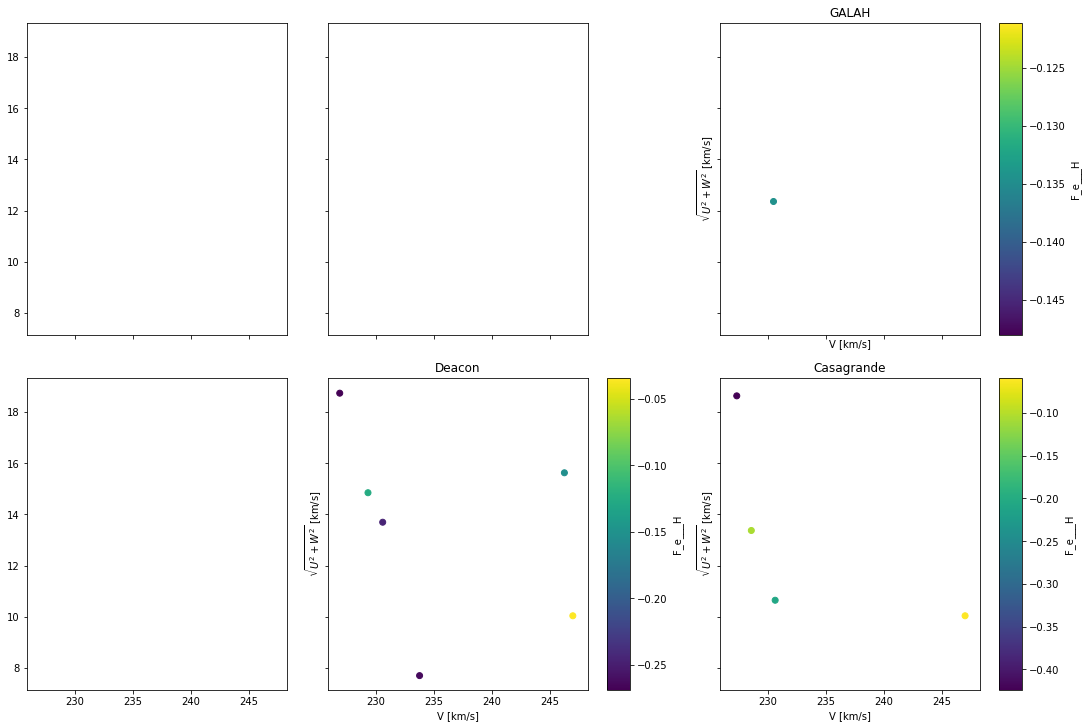

In [13]:
d = clusters["Alessi_24"]
fig = plot_Toomre_diagrams(d, color="Fe_H")

In [10]:
d.columns

Index(['Gaia_source_id', 'Gaia_RA', 'Gaia_Dec', 'Gaia_parallax',
       'Gaia_e_parallax', 'Gaia_pmra', 'Gaia_e_pmra', 'Gaia_pmdec',
       'Gaia_e_pmdec', 'Gaia_vrad', 'Gaia_e_vrad', 'Gaia_G_mag',
       'Gaia_G_mag_error', 'Gaia_BP_mag', 'Gaia_BP_mag_error', 'Gaia_RP_mag',
       'Gaia_RP_mag_error', 'Marchetti_U', 'Marchetti_el_U', 'Marchetti_eu_U',
       'Marchetti_V', 'Marchetti_el_V', 'Marchetti_eu_V', 'Marchetti_W',
       'Marchetti_el_W', 'Marchetti_eu_W', 'Marchetti_vtot',
       'Marchetti_el_vtot', 'Marchetti_eu_vtot', 'Bailer-Jones_r_est',
       'Bailer-Jones_r_lo', 'Bailer-Jones_r_hi', '2MASS_ID', 'TICID',
       'TESS_RA', 'TESS_Dec', 'GLONG', 'GLAT', 'TESSMAG', 'PRIORITY', 'HIP',
       'TYCHO2', 'TD_D', 'TD_D_le', 'TD_D_ue', 'TD_H', 'TD_H_le', 'TD_H_ue',
       'D', 'TD', 'H', 'APOGEE_Fe_H', 'APOGEE_Teff', 'APOGEE_logg',
       'APOGEE_alpha', 'GALAH_Fe_H', 'GALAH_Teff', 'GALAH_logg', 'GALAH_alpha',
       'RAVE_Fe_H', 'RAVE_Teff', 'RAVE_logg', 'RAVE_alpha', 'LAMOST_

No data for APOGEE_Teff
No data for RAVE_Teff
No data for LAMOST_Teff


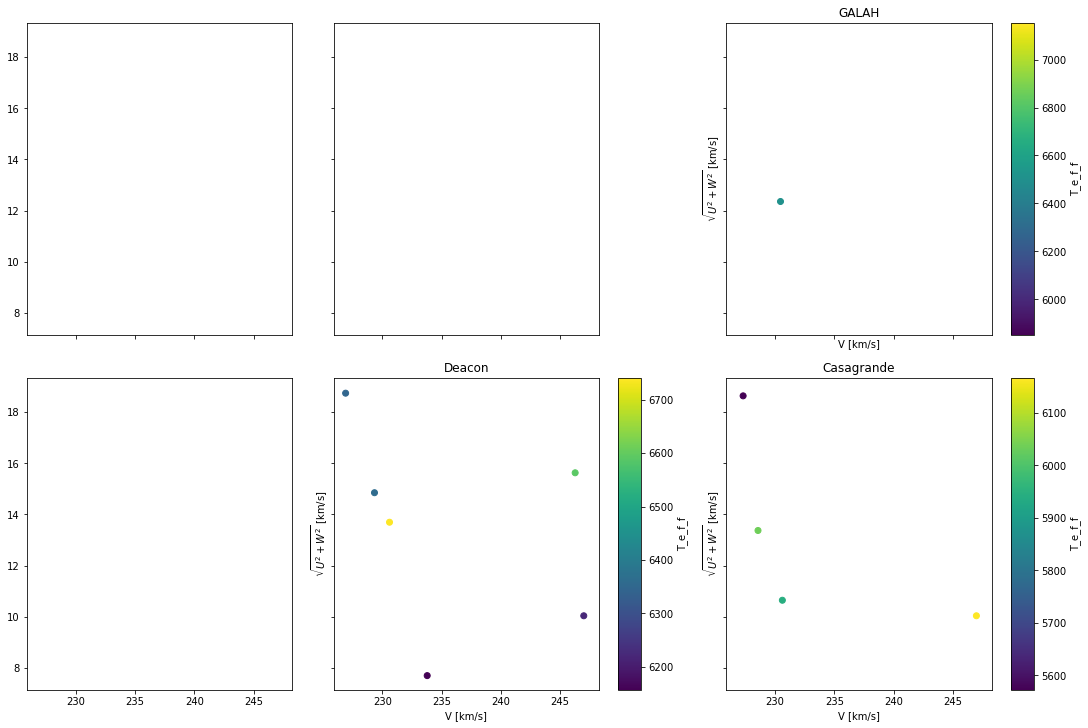

In [14]:
d = clusters["Alessi_24"]
fig = plot_Toomre_diagrams(d, color="Teff")